In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import math


In [167]:
url = r"Practice-2 Weight-Height Polynomial Dataset.csv"

df = pd.read_csv(url)

df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


# Data Preprocessing


<h4>Checking for null values</h4>

In [168]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

<h4>Checking Statistics</h4>  

In [169]:
df.describe(include='all')

,Weight,Height
count,50.000000,50.000000
mean,75.673912,111.473633
std,23.110656,39.493803
min,41.646760,68.971292
25%,54.701360,79.966731
50%,74.883900,98.819101
75%,91.988395,129.709758
max,117.592788,202.663424


Checking Info

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  50 non-null     float64
 1   Height  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


Checking Shape

In [171]:
df.shape

(50, 2)

<h4>Visualizing the Data</h4>

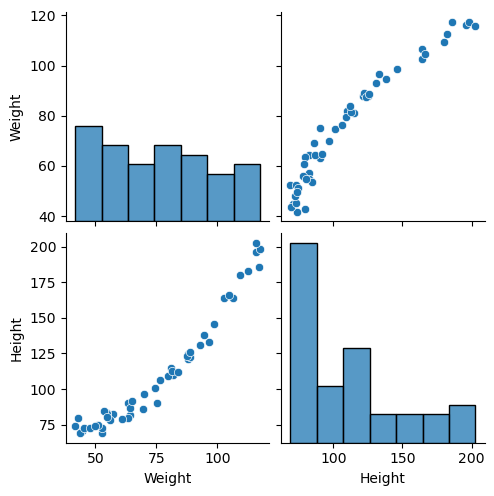

In [172]:
sns.pairplot(df)

<h4>Scaling the data

In [173]:
sca = StandardScaler()
X = df['Weight'].values.reshape(-1,1)

Creating X and y

In [174]:
X = df.Weight.values
y = df.Height.values

<h4>Train Test Split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4>Reshaping the data

In [176]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
#y_train=y_train.reshape(-1,1)
#y_test=y_test.reshape(-1,1)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (40, 1)
X_test shape: (10, 1)
y_train shape: (40,)
y_test shape: (10,)


<h1>Model Creation<h1>

<h3> Simple Linear Regression

In [177]:
linear = LinearRegression()
linear.fit(X_train.reshape(-1,1), y_train)


LinearRegression()

Predcicting using Simple Linear Regression

In [178]:
pred_linear = linear.predict(X_test.reshape(-1,1))

Evaluating Simple Linear Regression 

In [179]:
mse = mean_squared_error(y_test, pred_linear)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, pred_linear)
mae = mean_absolute_error(y_test, pred_linear)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)
print('MAE:', mae)


MSE: 117.22192004841368
RMSE: 10.826907224522323
R2: 0.8403417139170934
MAE: 8.882234589447728


Visualizing Using Simple Linear Regression

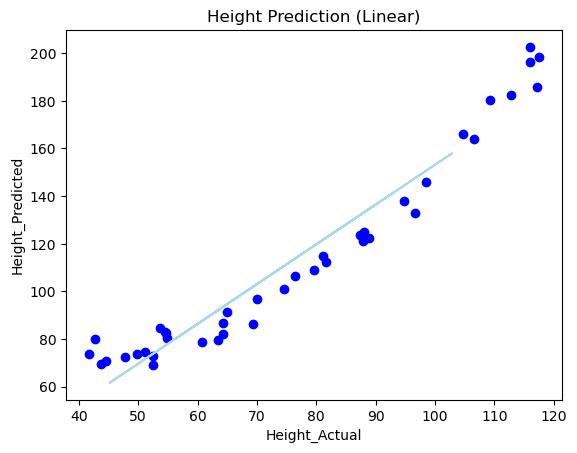

In [180]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_test, pred_linear, color = 'lightblue')
plt.title("Height Prediction (Linear)")
plt.xlabel("Height_Actual")
plt.ylabel('Height_Predicted')
plt.show()

# Using Polynomial Regression

In [181]:
Poly = PolynomialFeatures(degree=2)

Transforming the data

In [182]:
X_train_poly = Poly.fit_transform(X_train)
X_test_poly = Poly.fit_transform(X_test)
#y_train=y_train.reshape(-1,1)
#y_test=y_test.reshape(-1,1)

<h4>Training the Model</h4>

In [183]:
lin = LinearRegression()

lin.fit(X_train_poly, y_train)

LinearRegression()

Getting Predictions

In [184]:
y_pred = lin.predict(X_test_poly)

Evaluating the Model

In [185]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = math.sqrt(mse)

print(f"R2 Score: {r2}")    
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")



R2 Score: 0.9717532753949885
Mean Squared Error: 20.73888787431194
Mean Absolute Error: 3.461429854635168
Root Mean Squared Error: 4.553996911978745


Visualizing the Predicitons

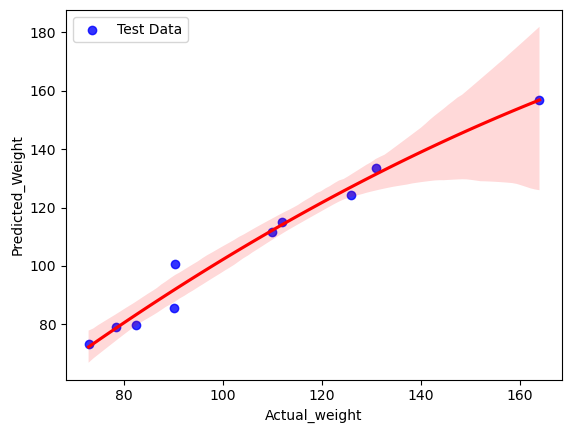

In [186]:
sns.regplot(x=y_test, y=y_pred,  data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"}, order=2, label="Test Data")
plt.xlabel('Actual_weight')
plt.ylabel('Predicted_Weight')
plt.legend()
plt.show()

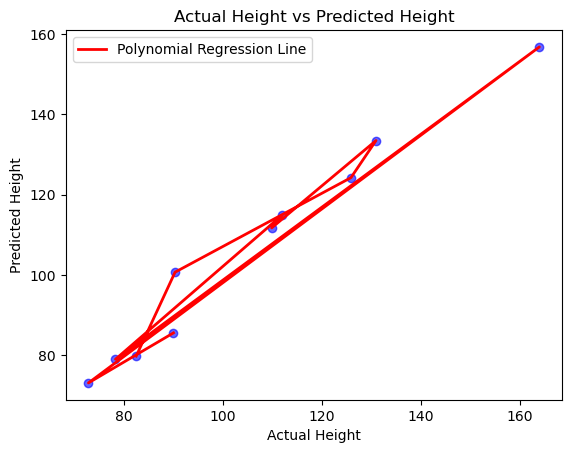

In [187]:
plt.scatter(y_test,y_pred, color='blue',alpha=0.6)
plt.plot(y_test, y_pred, color='red', linewidth=2, label='Polynomial Regression Line')
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual Height vs Predicted Height')
plt.legend()
plt.show()

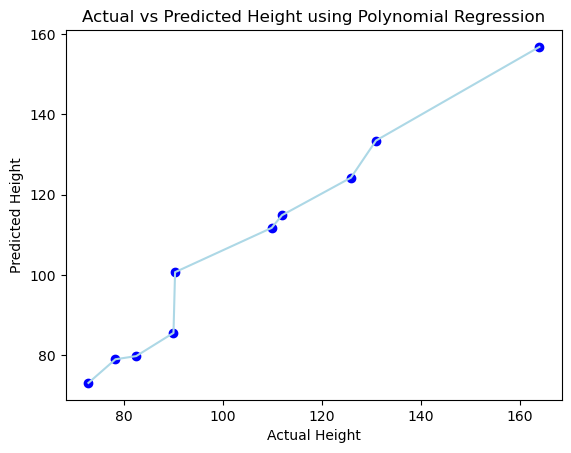

In [188]:
import numpy as np
sorted_idx = np.argsort(y_test)
Y_test_sorted = np.array(y_test)[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.scatter(y_test, y_pred, color='blue')
plt.plot(Y_test_sorted, y_pred_sorted, color='lightblue')
plt.title("Actual vs Predicted Height using Polynomial Regression")
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.show()
